# Players dataset generation

For more info, see here: https://docs.google.com/spreadsheets/d/1JEBWhN82CrcQeL7t1mdIukNd1iHnlYaYLJAVS8s8paQ/edit#gid=0

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from scipy.stats import norm, poisson
import seaborn as sns


# High-resolution please
%config InlineBackend.figure_format = 'retina'

In [2]:
n = 12  # number of observations

columns = [
    "id",       # int
    "name",     # str
    "country",  # categorical (country code)
    "age",      # int
    "ezlvl",    # categorical (1 or 0)
    "time",     # float
    "points",   # int
    "finished",	# categorical (1 or 0)
]

# latent variable
#   "jobstatus" # categorical (1=employed or 0=unemployed)

In [3]:
random.seed(42)
ids = [random.randint(500,800) for i in range(0,n)]
ids

[557, 512, 640, 625, 614, 571, 552, 779, 544, 716, 516, 515]

In [4]:
usernames = [
    "mary",
    "jane",
    "emil",
    "ivan",
    "hasan",
    "jordan",
    "sanjay",
    "lena",
    "shuo",
    "r0byn",
    "anna",
    "joro",
]


In [5]:
# categorical (country code)
#               ['mary', 'jane', 'emil', 'ivan', 'hasan', 'jordan', 'sanjay', 'lena', 'shuo', 'r0bin', 'anna', 'joro' ]
country_codes = ["us",  "ca",    "fr",   "ca",   "tr",    "us",     "ca",     "uk",   "cn",   "us",    "pl",   "bg"   ]
country_codes

['us', 'ca', 'fr', 'ca', 'tr', 'us', 'ca', 'uk', 'cn', 'us', 'pl', 'bg']

(33.75, [38, 21, 52, 50, 26, 45, 27, 23, 24, 59, 18, 22], 18)

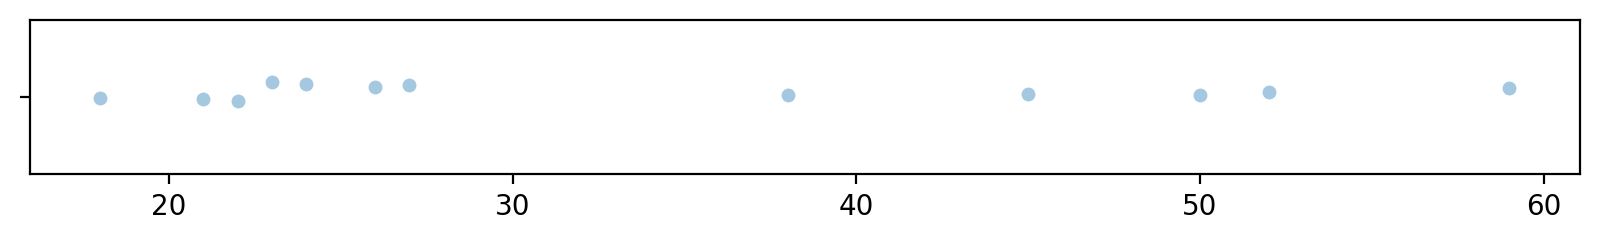

In [6]:
seed = 48
random.seed(seed)
np.random.seed(seed)

def gen_age():
    r = random.randint(0,2)
    if r == 0:
        age = poisson(mu=10, loc=13).rvs(1)[0]
    else:
        age = random.randint(18,60)
    return age

ages = [gen_age() for i in range(0,n)]
with plt.rc_context({"figure.figsize":(10,1)}):
    sns.stripplot(x=ages, jitter=0.1, alpha=0.4)
np.mean(ages), ages, min(ages)

In [7]:
random.seed(53)
ezlvls = [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]
ezlvls, sum(ezlvls)/len(ezlvls)

([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1], 0.5)

In [8]:
for i, age in enumerate(ages):
    print(str(i)+"-"+str(age), end=", ")

0-38, 1-21, 2-52, 3-50, 4-26, 5-45, 6-27, 7-23, 8-24, 9-59, 10-18, 11-22, 

In [9]:
# i-age        0-38, 1-21, 2-52, 3-50, 4-26, 5-45, 6-27, 7-23, 8-24, 9-59, 10-18, 11-22 
jobstatuses = [1,    1,    1,    1,    0,    1,    0,    0,    1,    1,    0,     0     ]
jobstatuses, sum(jobstatuses)/len(jobstatuses)

([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0], 0.5833333333333334)

(269.41290588554995,
 [124.93852827441272,
  331.63573247118194,
  324.61400286434304,
  39.508425874140556,
  253.1856321020095,
  28.492954202663157,
  585.8783691512555,
  408.75879762658036,
  194.7677803575266,
  255.54716366546495,
  303.6596305850437,
  381.9678534519779],
 28.492954202663157,
 28.492954202663157)

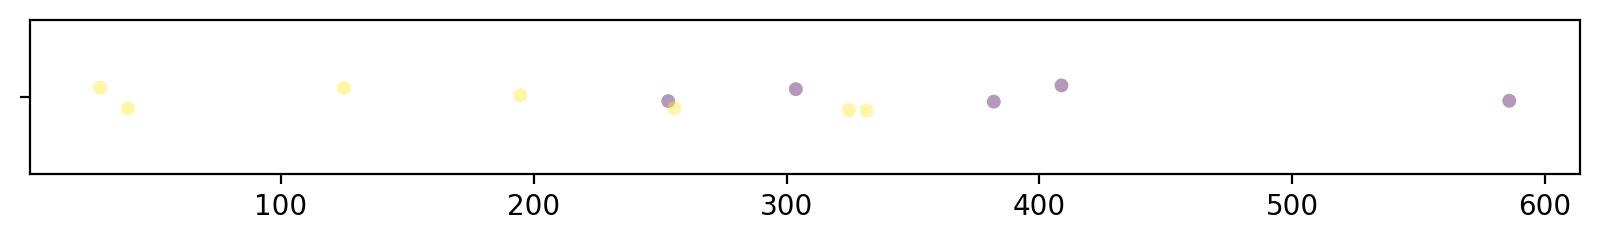

In [10]:
def get_time(age, jobstatus):
    if jobstatus == 1:
        time = norm(loc=200, scale=100).rvs(1)[0]
    else:
        time = norm(loc=400, scale=100).rvs(1)[0]
    return time

np.random.seed(44)
times = [get_time(age, jobstatus) for age, jobstatus in zip(ages, jobstatuses)]

with plt.rc_context({"figure.figsize":(10,1)}):
    sns.stripplot(x=times, c=jobstatuses, jitter=0.1, alpha=0.4)
np.mean(times), times, min(times), min(times)

In [11]:
# # times in hours (to check if reasonable)
# times_h = [t_min/60 for t_min in times]
# times_h

([418, 1149, 1321, 226, 815, 206, 2344, 1745, 1043, 1102, 1209, 1491],
 206,
 2344)

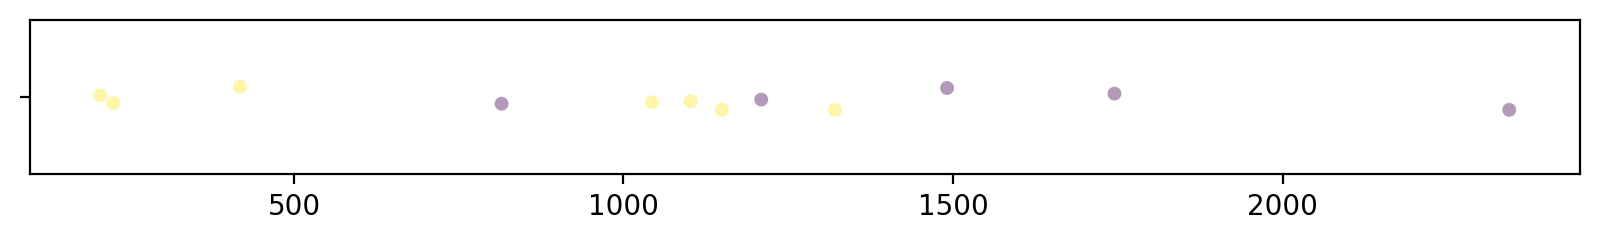

In [12]:
avg_pts_per_min = 4

np.random.seed(50)
def gen_points(time):
    boost = norm(0,50).rvs(1)[0]
    noise = norm(0,100).rvs(1)[0]
    points = avg_pts_per_min * time + boost + noise
    return int(points)

points = [gen_points(time) for time in times]
with plt.rc_context({"figure.figsize":(10,1)}):
    sns.stripplot(x=points, c=jobstatuses, jitter=0.1, alpha=0.4)

points, np.min(points), np.max(points)

In [13]:
# i-pts     0-592, 1-1327, 2-1408, 3-422, 4-1093, 5-109, 6-2306, 7-1670, 8-936, 9-1083, 10-1403, 11-1508, 
finisheds = [0,    1,      1,      0,     0,      0,     1,      1,      0,     0,      1,       1]
finisheds, sum(finisheds)/len(finisheds)

([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1], 0.5)

## Sanity checks

In [14]:
players_dict = {
    "id":ids,
    "username": usernames,
    "country": country_codes,
    "jobstatus": jobstatuses,
    "age":ages,
    "ezlvl":ezlvls,
    "time":[time.round(2) for time in times],
    "points":points,
    "finished":finisheds
}
for value in players_dict.values():
    assert len(value) == n


## Create full data frame

In [15]:
players_full = pd.DataFrame(players_dict)
players_full

,id,username,country,jobstatus,age,ezlvl,time,points,finished
0,557,mary,us,1,38,0,124.94,418,0
1,512,jane,ca,1,21,0,331.64,1149,1
2,640,emil,fr,1,52,1,324.61,1321,1
3,625,ivan,ca,1,50,1,39.51,226,0
4,614,hasan,tr,0,26,1,253.19,815,0
5,571,jordan,us,1,45,0,28.49,206,0
6,552,sanjay,ca,0,27,1,585.88,2344,1
7,779,lena,uk,0,23,0,408.76,1745,1
8,544,shuo,cn,1,24,1,194.77,1043,0
9,716,r0byn,us,1,59,0,255.55,1102,0


## Create players data frame

In [16]:
players = players_full.drop(columns=["jobstatus"])
players

,id,username,country,age,ezlvl,time,points,finished
0,557,mary,us,38,0,124.94,418,0
1,512,jane,ca,21,0,331.64,1149,1
2,640,emil,fr,52,1,324.61,1321,1
3,625,ivan,ca,50,1,39.51,226,0
4,614,hasan,tr,26,1,253.19,815,0
5,571,jordan,us,45,0,28.49,206,0
6,552,sanjay,ca,27,1,585.88,2344,1
7,779,lena,uk,23,0,408.76,1745,1
8,544,shuo,cn,24,1,194.77,1043,0
9,716,r0byn,us,59,0,255.55,1102,0


In [17]:
# for copy-pasting into LaTeX
# print(players.to_latex())

## Save data files

In [18]:
players.to_csv("../datasets/players.csv", index=False)

In [19]:
# for copy pasting into gsheet
# https://docs.google.com/spreadsheets/d/1JEBWhN82CrcQeL7t1mdIukNd1iHnlYaYLJAVS8s8paQ/edit#gid=182671088
# players.to_csv("../datasets/players.tsv", sep="\t")

## Preliminary analysis

### Use case 1
In Sec 1.1	use `time ~ ezlvl` to discuss experiment on improvements in retention


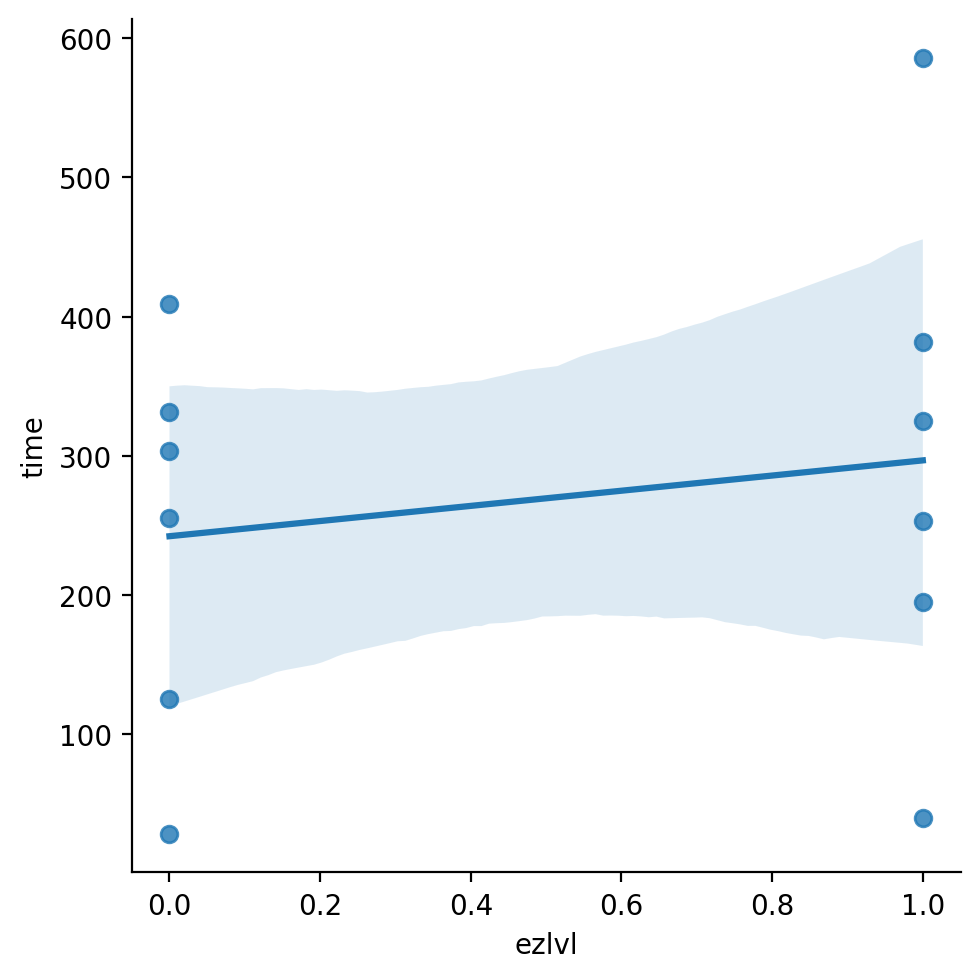

In [20]:
sns.lmplot(x="ezlvl", y="time", data=players)

### Use case 2
In Sec 1.1 use `time ~ age` to look for correlation between age and engagement.

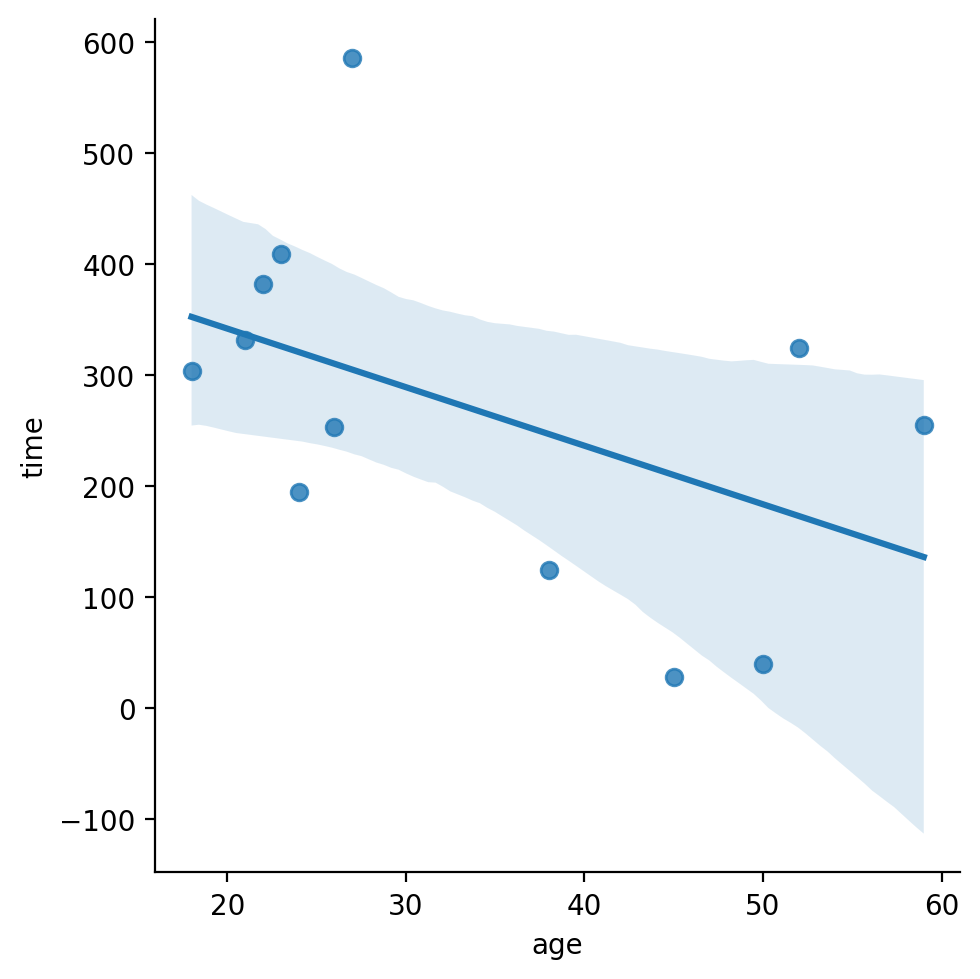

In [21]:
sns.lmplot(x="age", y="time", data=players)

#### Use case 3	

In Sec 1.1	`jobstatus` (non-existent)	explain possible confounding of `time~age` correlation by confounder var. "employed" no time to play game vs. "unemployed" has time to play game, with young ppl being more likely to be unemployed

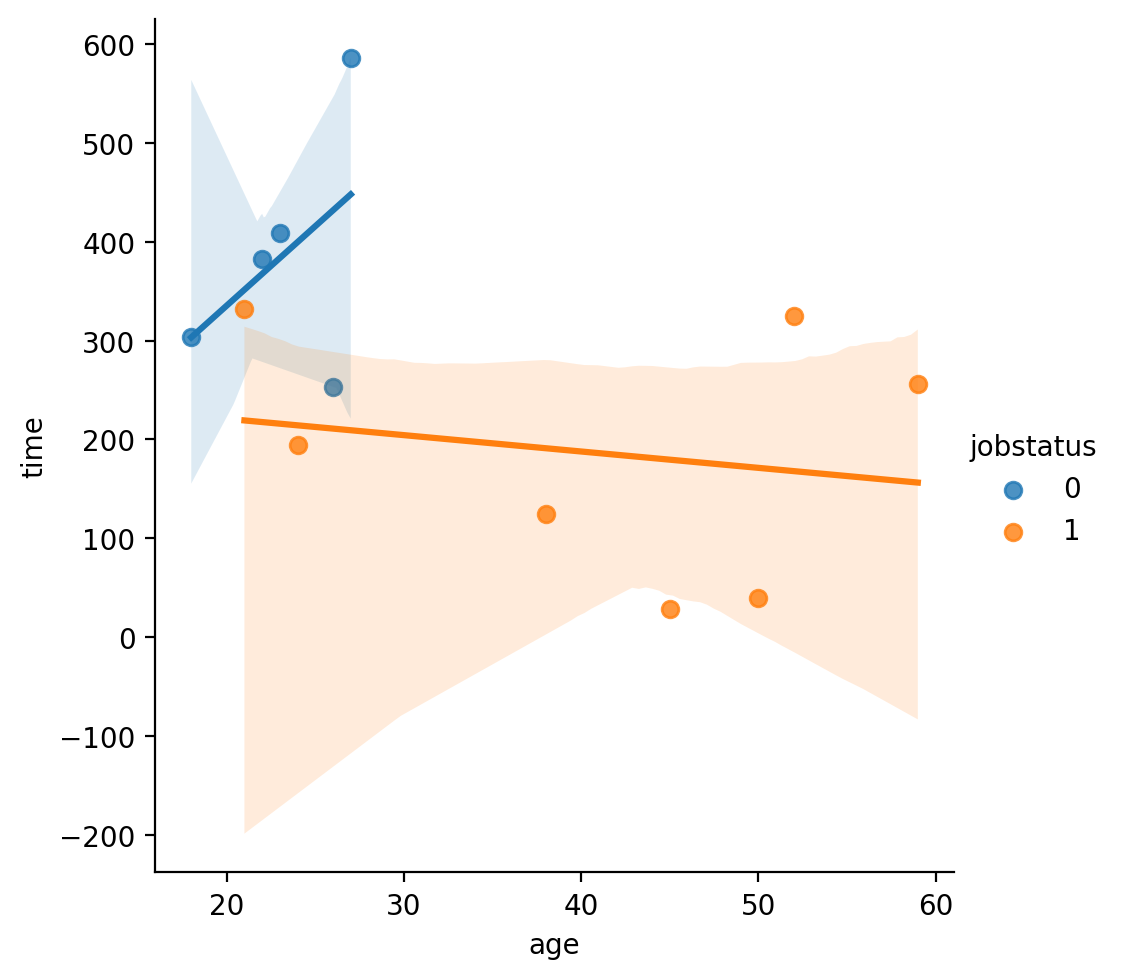

In [22]:
sns.lmplot(x="age", y="time", hue="jobstatus", data=players_full)

### Check if data frame is balanced

Did the `ezlvl` random assignment give us two comparable groups?

In [23]:
players_full.groupby("ezlvl")[["jobstatus","time","age","points","finished"]].describe().T

ezlvl                      0            1
jobstatus count     6.000000     6.000000
          mean      0.666667     0.500000
          std       0.516398     0.547723
          min       0.000000     0.000000
          25%       0.250000     0.000000
          50%       1.000000     0.500000
          75%       1.000000     1.000000
          max       1.000000     1.000000
time      count     6.000000     6.000000
          mean    242.173333   296.655000
          std     140.797137   184.447576
          min      28.490000    39.510000
          25%     157.592500   209.375000
          50%     279.605000   288.900000
          75%     324.645000   367.630000
          max     408.760000   585.880000
age       count     6.000000     6.000000
          mean     34.000000    33.500000
          std      16.174053    13.678450
          min      18.000000    22.000000
          25%      21.500000    24.500000
          50%      30.500000    26.500000
          75%      43.250000    44.250000
          max      59.000000    52.000000
points    count     6.000000     6.000000
          mean    971.500000  1206.666667
          std     564.906629   711.244168
          min     206.000000   226.000000
          25%     589.000000   872.000000
          50%    1125.500000  1182.000000
          75%    1194.000000  1448.500000
          max    1745.000000  2344.000000
finished  count     6.000000     6.000000
          mean      0.500000     0.500000
          std       0.547723     0.547723
          min       0.000000     0.000000
          25%       0.000000     0.000000
          50%       0.500000     0.500000
          75%       1.000000     1.000000
          max       1.000000     1.000000